In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Dataset Description

The dataset contains information regarding the COVID-19 pandemic in different countries from 18th April,2020 to 17 May,2020. Population, Total Tests, Total Cases, Total Deaths, Total Recovered etc. are present in the dataset along with the poplation of each country. We have additional dataset containing the fraction of populations of country as per age groups for analysis as death rate due to COVID-19 is age dependent. We can use both the dataset for analysis and a model can be prepared from the combined dataset to predict the country wise deaths due to COVID-19 pandemic.

In [2]:
df = pd.read_csv("covid_data.csv",parse_dates=["Date"])
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [3]:
df.shape

(6603, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 6603 non-null   datetime64[ns]
 1   Country              6603 non-null   object        
 2   Population           6603 non-null   int64         
 3   Total Tests          5505 non-null   float64       
 4   Total Cases          6554 non-null   float64       
 5   Total Deaths         5367 non-null   float64       
 6   Total Recovered      6318 non-null   float64       
 7   Serious or Critical  4117 non-null   float64       
 8   Active Cases         6544 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 464.4+ KB


In [5]:
df["Date"].nunique()

31

Let us group all the entries by Date

In [6]:
Date = df.groupby(['Date'],sort = True).sum()
Date

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
Date,,,,,,,
2020-04-18,7748754715,19847624.0,2330045.0,160032.0,595244.0,55258.0,1574175.0
2020-04-19,7748754715,20565761.0,2405050.0,164994.0,623676.0,54218.0,1615786.0
2020-04-20,7748754715,21597361.0,2479782.0,170382.0,645090.0,56756.0,1663716.0
2020-04-21,7748754715,22614613.0,2555027.0,177444.0,688988.0,57247.0,1688001.0
2020-04-22,7748754715,23334041.0,2634998.0,184051.0,716205.0,56682.0,1734148.0
2020-04-23,7748754715,24427775.0,2716085.0,190513.0,744174.0,58692.0,1780804.0
2020-04-24,7748754715,25574910.0,2827896.0,197076.0,797132.0,58527.0,1833094.0
2020-04-25,7748754715,26861236.0,2918683.0,203149.0,835373.0,58198.0,1879567.0
2020-04-26,7748754715,27975924.0,2992542.0,206900.0,876172.0,57596.0,1908876.0


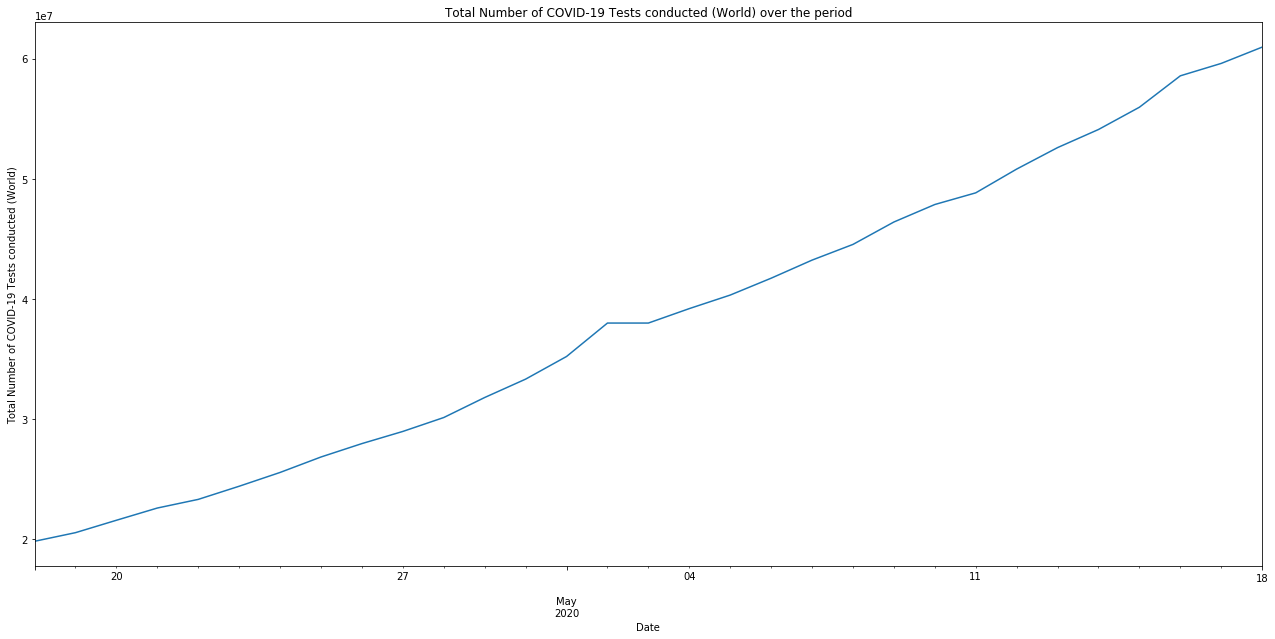

In [96]:
plt.figure(figsize= (22,10))
plt.ylabel('Total Number of COVID-19 Tests conducted (World)')
plt.title('Total Number of COVID-19 Tests conducted (World) over the period')
Date["Total Tests"].plot()

Total Number of COVID-19 Tests conducted (World) has increased linearly.

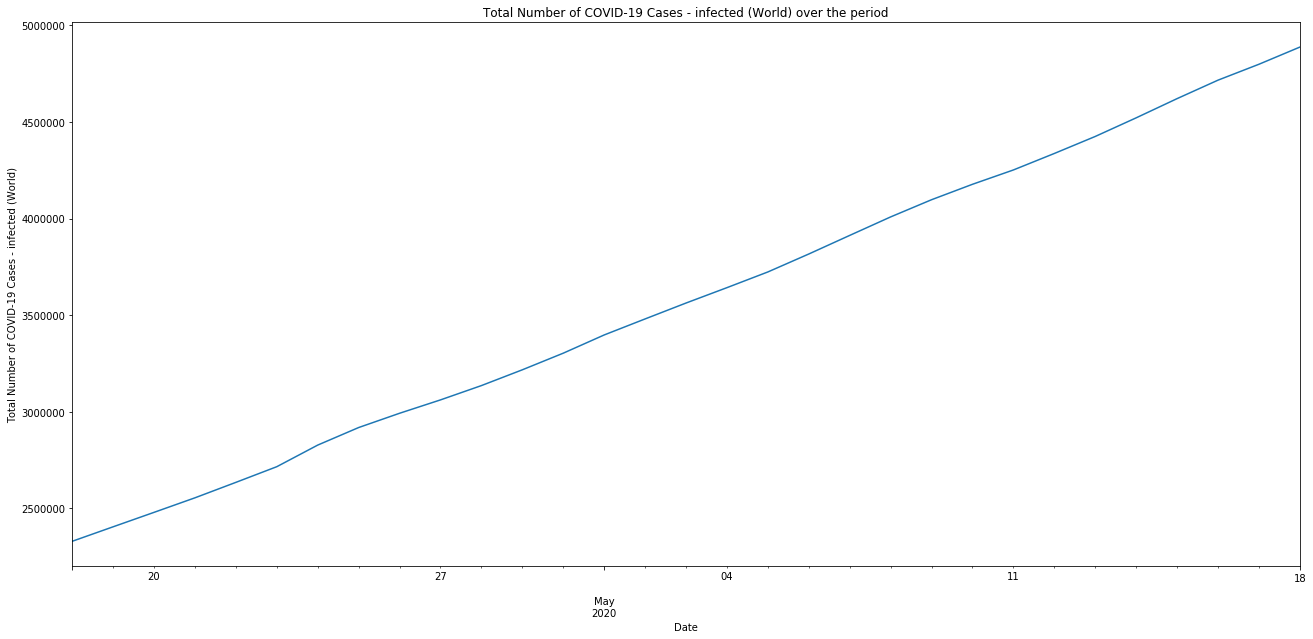

In [7]:
plt.figure(figsize= (22,10))
plt.ylabel('Total Number of COVID-19 Cases - infected (World)')
plt.title('Total Number of COVID-19 Cases - infected (World) over the period')
Date["Total Cases"].plot()

Total Number of COVID-19 Cases confirmed (World) has increased linearly.

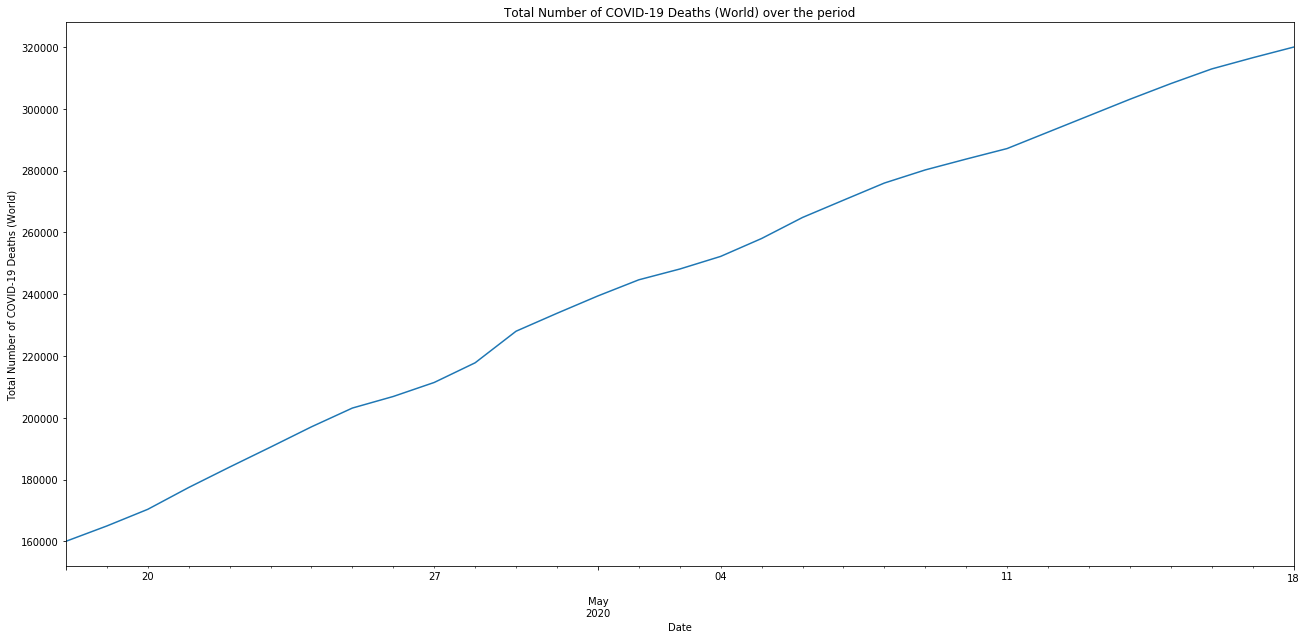

In [8]:
plt.figure(figsize= (22,10))
plt.ylabel('Total Number of COVID-19 Deaths (World)')
plt.title('Total Number of COVID-19 Deaths (World) over the period')
Date["Total Deaths"].plot()

Total Number of COVID-19 deaths (World) has increased linearly.

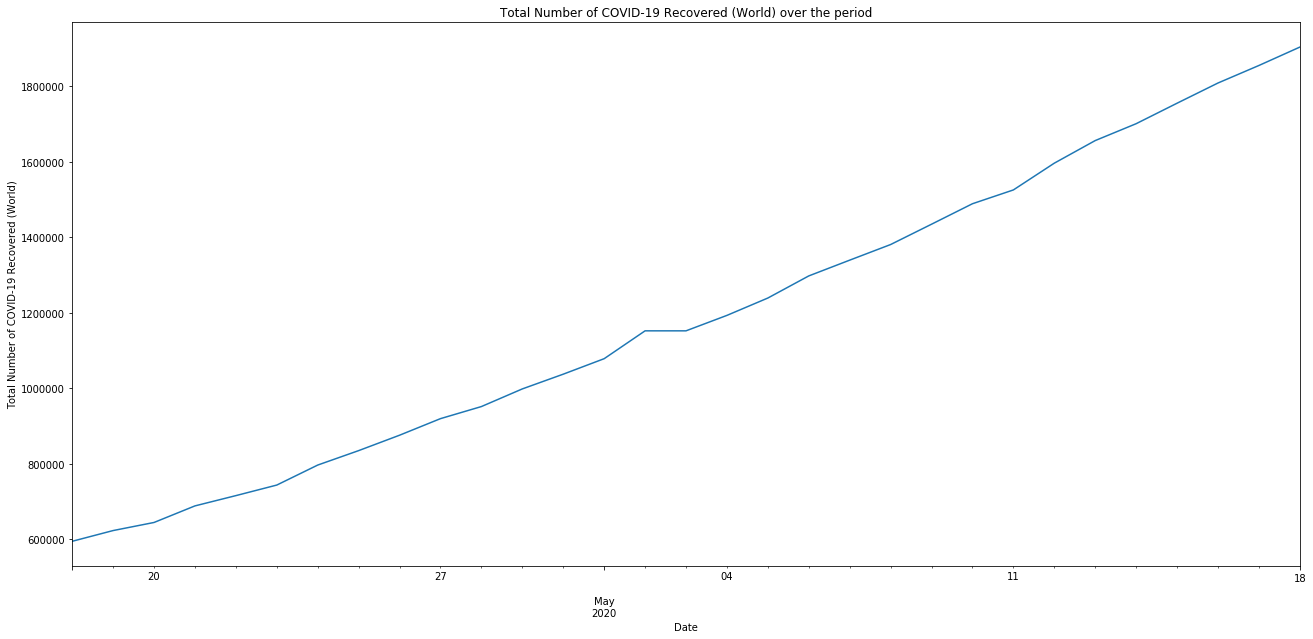

In [9]:
plt.figure(figsize= (22,10))
plt.ylabel('Total Number of COVID-19 Recovered (World)')
plt.title('Total Number of COVID-19 Recovered (World) over the period')
Date["Total Recovered"].plot()

Total Number of COVID-19 recovered (World) has increased linearly.

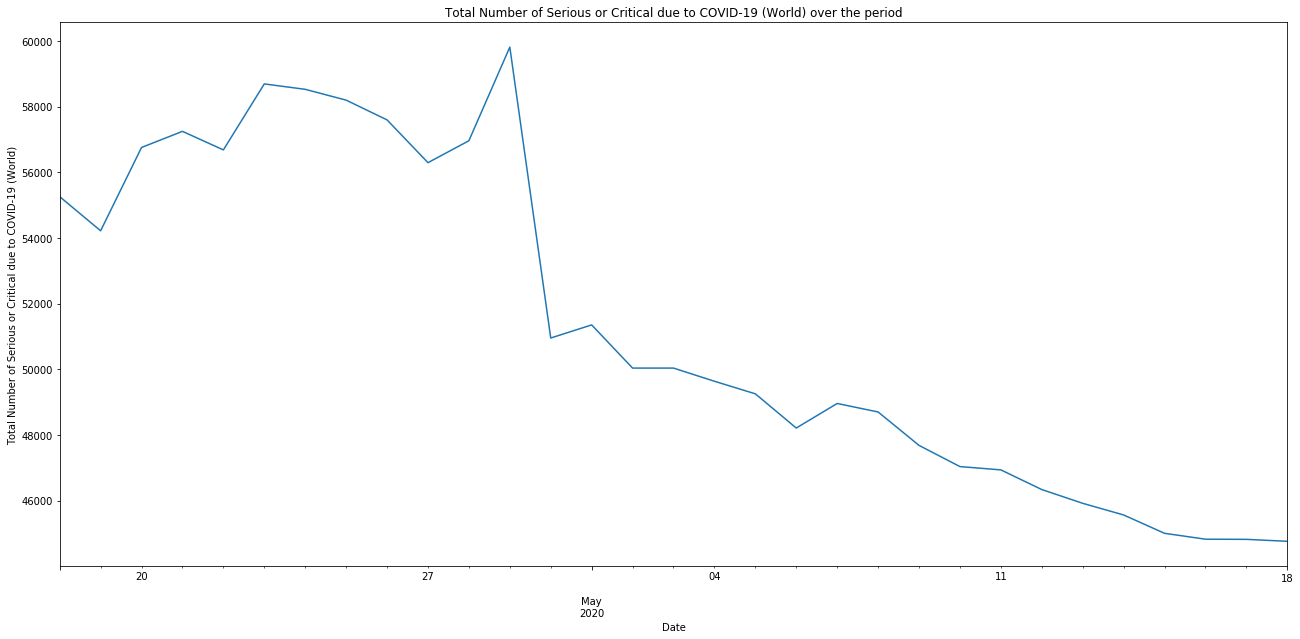

In [10]:
plt.figure(figsize= (22,10))
plt.ylabel('Total Number of Serious or Critical due to COVID-19 (World)')
plt.title('Total Number of Serious or Critical due to COVID-19 (World) over the period')
Date["Serious or Critical"].plot()

Total Number of COVID-19 serious or critical patients (World) has decreased over the period.

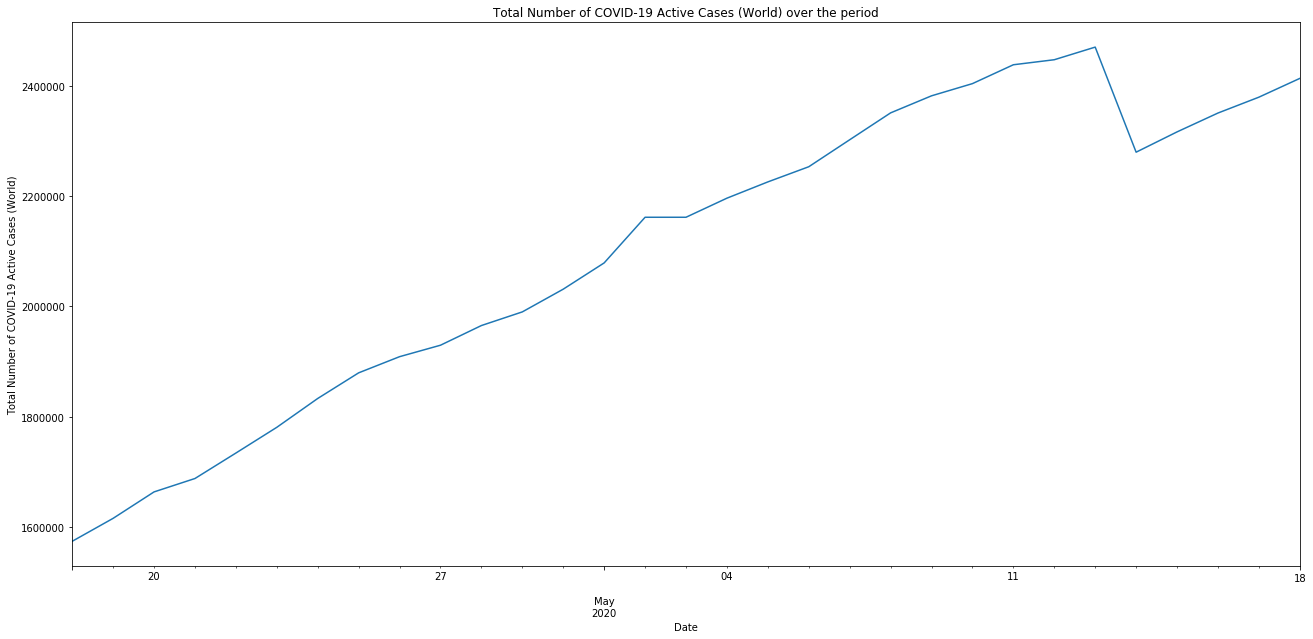

In [11]:
plt.figure(figsize= (22,10))
plt.ylabel('Total Number of COVID-19 Active Cases (World)')
plt.title('Total Number of COVID-19 Active Cases (World) over the period')
Date["Active Cases"].plot()

In [12]:
Date.reset_index(level=0, inplace=True)
Date

,Date,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,7748754715,19847624.0,2330045.0,160032.0,595244.0,55258.0,1574175.0
1,2020-04-19,7748754715,20565761.0,2405050.0,164994.0,623676.0,54218.0,1615786.0
2,2020-04-20,7748754715,21597361.0,2479782.0,170382.0,645090.0,56756.0,1663716.0
3,2020-04-21,7748754715,22614613.0,2555027.0,177444.0,688988.0,57247.0,1688001.0
4,2020-04-22,7748754715,23334041.0,2634998.0,184051.0,716205.0,56682.0,1734148.0
5,2020-04-23,7748754715,24427775.0,2716085.0,190513.0,744174.0,58692.0,1780804.0
6,2020-04-24,7748754715,25574910.0,2827896.0,197076.0,797132.0,58527.0,1833094.0
7,2020-04-25,7748754715,26861236.0,2918683.0,203149.0,835373.0,58198.0,1879567.0
8,2020-04-26,7748754715,27975924.0,2992542.0,206900.0,876172.0,57596.0,1908876.0
9,2020-04-27,7748754715,28987035.0,3061748.0,211432.0,920075.0,56293.0,1929647.0


Text(0.5, 1.0, 'Total Infected vs Recovered vs Active Cases')

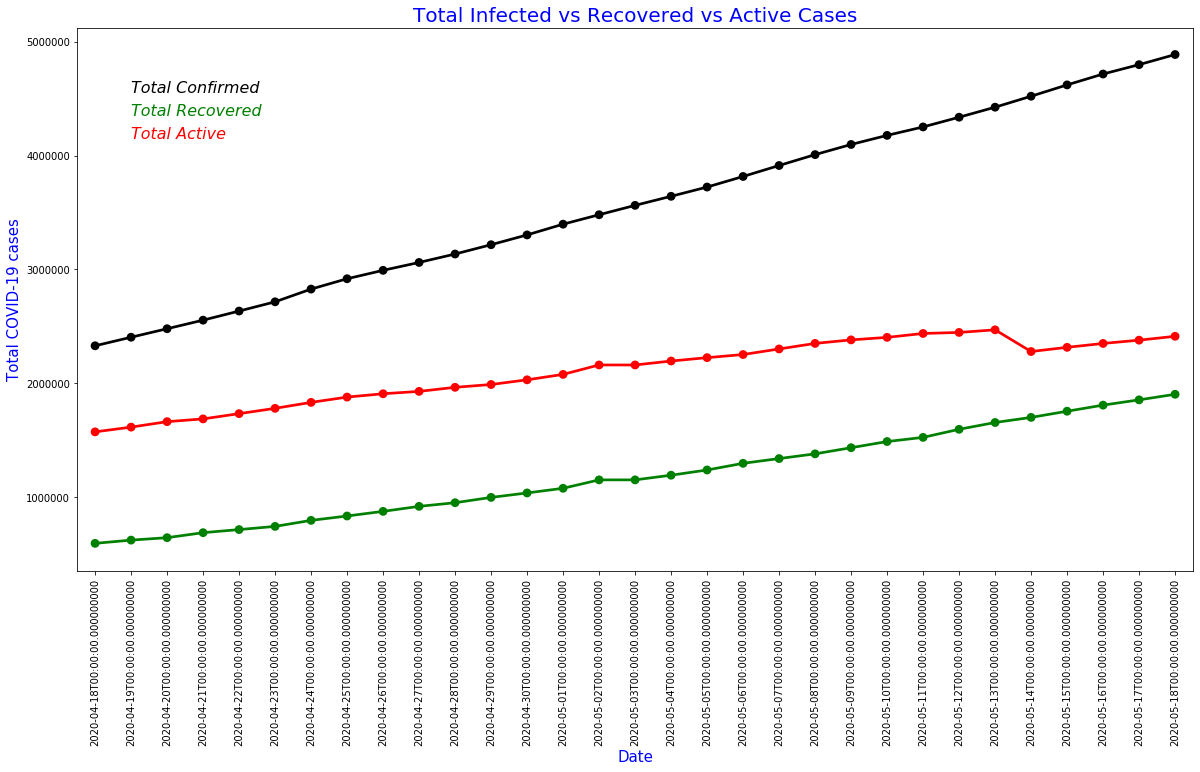

In [13]:
f, ax1 = plt.subplots(figsize=(20,10))
sns.pointplot(x='Date', y='Total Cases', data=Date, color='black', alpha=0.8)
sns.pointplot(x='Date', y='Total Recovered', data=Date, color='green', alpha=1)
sns.pointplot(x='Date', y='Active Cases', data=Date, color='red', alpha=1)
plt.text(1,4550000, 'Total Confirmed', color='black', fontsize=16, style='italic')
plt.text(1,4350000, 'Total Recovered', color='green',fontsize=16, style='italic')
plt.text(1,4150000, 'Total Active', color='red',fontsize=16, style='italic')
plt.xlabel('Date', fontsize=15, color='blue')
plt.xticks(rotation=90)
plt.ylabel('Total COVID-19 cases', fontsize=15, color='blue')
plt.title('Total Infected vs Recovered vs Active Cases', fontsize=20, color='blue')

From the above plot, total number of recovered people is catching up with active cases gradually

Let us take the final figures for all countries (and maxumum number of serious of critical patients) for machine learning model

In [14]:
country_max = df.groupby(['Country'],sort = True).max()
country_max

,Date,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
Country,,,,,,,,
Afghanistan,2020-05-18,38817349,23497.0,7072.0,173.0,801.0,19.0,6098.0
Albania,2020-05-18,2878155,12192.0,948.0,31.0,727.0,10.0,289.0
Algeria,2020-05-18,43752773,6500.0,7201.0,555.0,3625.0,60.0,3021.0
Andorra,2020-05-18,77251,3750.0,761.0,51.0,624.0,17.0,464.0
Angola,2020-05-18,32731783,6136.0,50.0,3.0,17.0,NaN,32.0
...,...,...,...,...,...,...,...,...
Vietnam,2020-05-18,97234232,275000.0,324.0,0.0,263.0,8.0,67.0
Western Sahara,2020-05-18,595462,NaN,6.0,0.0,6.0,NaN,6.0
Yemen,2020-05-18,29742981,120.0,130.0,20.0,1.0,NaN,109.0


Let's load the age wise population fractions for the machine learning model

In [15]:
df1 = pd.read_csv("covid_age_group.csv")
df1.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


In [16]:
df1.shape

(213, 4)

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   213 non-null    object 
 1   Fraction age 0-14 years   176 non-null    float64
 2   Fraction age 15-64 years  176 non-null    float64
 3   Fraction age 65+ years    176 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.8+ KB


In [21]:
df1[df1["Fraction age 65+ years"] == df1["Fraction age 65+ years"].max()]

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
36,Japan,0.129,0.601,0.27


Japan has the highest fraction (0.27) of elderly population (65+)

In [22]:
df1[df1["Fraction age 65+ years"] == df1["Fraction age 65+ years"].min()]

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
28,UAE,0.139,0.85,0.011


UAE has the lowest fraction (0.011) of elderly population (65+)

In [23]:
df1[df1["Fraction age 15-64 years"] == df1["Fraction age 15-64 years"].max()]

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
28,UAE,0.139,0.85,0.011


UAE has the highest fraction (0.85) of young & middle aged population (15-64)

In [24]:
df1[df1["Fraction age 15-64 years"] == df1["Fraction age 15-64 years"].min()]

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
107,Niger,0.502,0.472,0.026


Niger has the lowest fraction (0.472) of young & middle aged population (15-64)

In [25]:
df1[df1["Fraction age 0-14 years"] == df1["Fraction age 0-14 years"].max()]

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
107,Niger,0.502,0.472,0.026


Niger has the highest fraction (0.502) of child population (0-14)

In [26]:
df1[df1["Fraction age 0-14 years"] == df1["Fraction age 0-14 years"].min()]

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
98,Hong Kong,0.115,0.722,0.163


Hong-Kong has the lowest fraction (0.115) of child population (0-14)

In [27]:
df1.set_index('Country',inplace=True)

In [28]:
df1.head()

,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
Country,,,
USA,0.189,0.657,0.154
Russia,0.176,0.682,0.142
Spain,0.147,0.659,0.194
Brazil,0.217,0.697,0.086
UK,0.177,0.638,0.185


Let's merge both the dataframe as per indices for the machine learning model.

In [49]:
df_model = pd.merge(country_max, df1, left_index=True, right_index=True)
df_model

,Date,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
Country,,,,,,,,,,,
Afghanistan,2020-05-18,38817349,23497.0,7072.0,173.0,801.0,19.0,6098.0,0.432,0.542,0.026
Albania,2020-05-18,2878155,12192.0,948.0,31.0,727.0,10.0,289.0,0.174,0.689,0.132
Algeria,2020-05-18,43752773,6500.0,7201.0,555.0,3625.0,60.0,3021.0,0.293,0.645,0.062
Andorra,2020-05-18,77251,3750.0,761.0,51.0,624.0,17.0,464.0,NaN,NaN,NaN
Angola,2020-05-18,32731783,6136.0,50.0,3.0,17.0,NaN,32.0,0.468,0.508,0.024
...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,2020-05-18,97234232,275000.0,324.0,0.0,263.0,8.0,67.0,0.231,0.698,0.072
Western Sahara,2020-05-18,595462,NaN,6.0,0.0,6.0,NaN,6.0,NaN,NaN,NaN
Yemen,2020-05-18,29742981,120.0,130.0,20.0,1.0,NaN,109.0,0.399,0.572,0.029


Let's convert the fraction population in df_model to actual population of that age group by multiplying with corresponding population.

In [50]:
df_model["Fraction age 0-14 years"]=df_model["Fraction age 0-14 years"]*df_model["Population"]
df_model["Fraction age 15-64 years"]=df_model["Fraction age 15-64 years"]*df_model["Population"]
df_model["Fraction age 65+ years"]=df_model["Fraction age 65+ years"]*df_model["Population"]

In [51]:
df_model.head()

,Date,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
Country,,,,,,,,,,,
Afghanistan,2020-05-18,38817349,23497.0,7072.0,173.0,801.0,19.0,6098.0,1.676909e+07,2.103900e+07,1009251.074
Albania,2020-05-18,2878155,12192.0,948.0,31.0,727.0,10.0,289.0,5.007990e+05,1.983049e+06,379916.460
Algeria,2020-05-18,43752773,6500.0,7201.0,555.0,3625.0,60.0,3021.0,1.281956e+07,2.822054e+07,2712671.926
Andorra,2020-05-18,77251,3750.0,761.0,51.0,624.0,17.0,464.0,NaN,NaN,NaN
Angola,2020-05-18,32731783,6136.0,50.0,3.0,17.0,NaN,32.0,1.531847e+07,1.662775e+07,785562.792


In [52]:
#Check for Null values
df_model.isnull().sum()

Date                         0
Population                   0
Total Tests                 28
Total Cases                  0
Total Deaths                 1
Total Recovered              4
Serious or Critical         71
Active Cases                 0
Fraction age 0-14 years     37
Fraction age 15-64 years    37
Fraction age 65+ years      37
dtype: int64

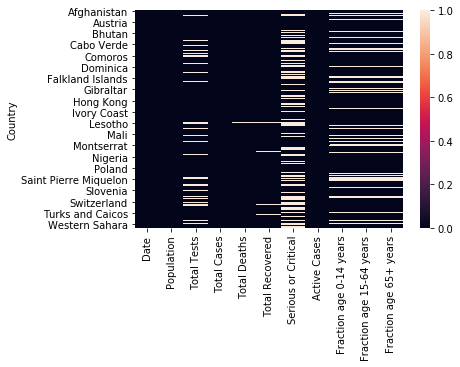

In [53]:
sns.heatmap(df_model.isnull())

In [54]:
dfcor = df_model.corr()
dfcor

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
Population,1.000000,0.355819,0.242402,0.196952,0.312183,0.225115,0.199549,0.966459,0.998630,0.937468
Total Tests,0.355819,1.000000,0.922129,0.835955,0.869549,0.823829,0.908858,0.250788,0.349938,0.625205
Total Cases,0.242402,0.922129,1.000000,0.937956,0.896725,0.932118,0.989787,0.186632,0.228484,0.365119
Total Deaths,0.196952,0.835955,0.937956,1.000000,0.895322,0.916413,0.915206,0.138627,0.183105,0.328179
Total Recovered,0.312183,0.869549,0.896725,0.895322,1.000000,0.915655,0.827899,0.235071,0.300908,0.438027
Serious or Critical,0.225115,0.823829,0.932118,0.916413,0.915655,1.000000,0.891662,0.194259,0.203543,0.316279
Active Cases,0.199549,0.908858,0.989787,0.915206,0.827899,0.891662,1.000000,0.154512,0.184880,0.315819
Fraction age 0-14 years,0.966459,0.250788,0.186632,0.138627,0.235071,0.194259,0.154512,1.000000,0.952879,0.827141
Fraction age 15-64 years,0.998630,0.349938,0.228484,0.183105,0.300908,0.203543,0.184880,0.952879,1.000000,0.947325
Fraction age 65+ years,0.937468,0.625205,0.365119,0.328179,0.438027,0.316279,0.315819,0.827141,0.947325,1.000000


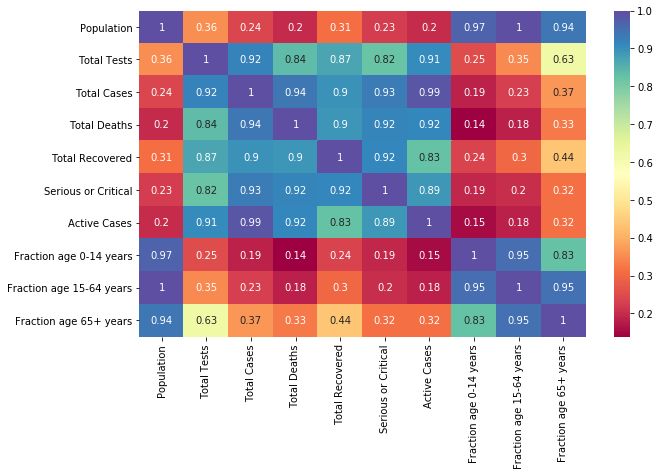

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Spectral',annot=True)

From the above heatmap, we can clearly confirm that Population of people over 65 years has very high correlation with number of COVID-19 cases, number of deaths & number of total recovered compared to population below 65 years old. Population of children below 14 years has the least correlation with number of COVID-19 cases, number of deaths & number of total recovered.

Let's drop the serious or critical column as it has too many null values which will reduce the size of machine learning dataset

In [56]:
df_model.drop("Serious or Critical",axis=1,inplace=True)

In [57]:
df_model.drop("Date",axis=1,inplace=True)

In [58]:
df_model.shape

(213, 9)

In [59]:
#Let's drop all the null value rows
df_model.dropna(inplace=True)
df_model.shape

(156, 9)

In [60]:
df_model.skew()

Population                   9.464681
Total Tests                  7.396657
Total Cases                 10.158005
Total Deaths                 8.540412
Total Recovered              6.022418
Active Cases                11.024390
Fraction age 0-14 years      9.425834
Fraction age 15-64 years     9.571078
Fraction age 65+ years       6.520604
dtype: float64

In [61]:
df_model.head()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
Country,,,,,,,,,
Afghanistan,38817349,23497.0,7072.0,173.0,801.0,6098.0,1.676909e+07,2.103900e+07,1009251.074
Albania,2878155,12192.0,948.0,31.0,727.0,289.0,5.007990e+05,1.983049e+06,379916.460
Algeria,43752773,6500.0,7201.0,555.0,3625.0,3021.0,1.281956e+07,2.822054e+07,2712671.926
Angola,32731783,6136.0,50.0,3.0,17.0,32.0,1.531847e+07,1.662775e+07,785562.792
Antigua and Barbuda,97833,183.0,25.0,3.0,19.0,17.0,2.338209e+04,6.770044e+04,6750.477


In [62]:
X=df_model.drop("Total Deaths", axis=1)
y=df_model["Total Deaths"]

In [63]:
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)
X2

array([[ 0.00903527, -0.28488917, -0.16505184, ...,  0.19452434,
        -0.04154987, -0.24419881],
       [-0.29286414, -0.29415142, -0.21156089, ..., -0.29582251,
        -0.28414888, -0.31672999],
       [ 0.05049423, -0.29881491, -0.16407215, ...,  0.07548048,
         0.04987737, -0.04787857],
       ...,
       [-0.06719199, -0.30404208, -0.21777323, ...,  0.0467826 ,
        -0.09280461, -0.2611066 ],
       [-0.16317216, -0.28949531, -0.21298107, ..., -0.06357549,
        -0.18650188, -0.30773901],
       [-0.19241073, -0.27457902, -0.21841117, ..., -0.12667475,
        -0.20362117, -0.31263798]])

Let's do Principal Component Analysis (PCA) for the input features

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X2)
X_pca = pca.transform(X2)
print("Original shape: {}".format(str(X2.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (156, 8)
Reduced shape: (156, 2)


Finding best random_state for Linear Regression Model

In [65]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
max_r2_score=0
for r_state in range(0,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=r_state)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r2_score:
        max_r2_score = r2_scr
        final_r_state = r_state
    
print("max R2 score corresponding to random state",final_r_state,"is",max_r2_score)

max R2 score corresponding to random state 84 is 0.9873174050482524


In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=84)

In [67]:
print(X_train.shape,"\n",X_test.shape)

(117, 8) 
 (39, 8)


In [68]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [69]:
LR = LinearRegression()
RR = Ridge()
LSR = Lasso()
KNR = KNeighborsRegressor()#(n_neighbors=2)
SV = SVR()
DTC = DecisionTreeRegressor()
RFC = RandomForestRegressor()
ABC = AdaBoostRegressor()#(n_estimators=100,base_estimator=SV,algorithm='SAMME')
GBC = GradientBoostingRegressor()
XGB = xgb.XGBRegressor()# From the GridSearchCV parameter tuning

In [70]:
models = []
models.append(("LinearRegression", LR))
models.append(("Ridge", RR))
models.append(("Lasso", LSR))
models.append(("KNeighborsRegressor", KNR))
models.append(("SVR", SV))
models.append(("DecisionTreeRegressor", DTC))
models.append(("RandomForestRegressor", RFC))
models.append(("AdaBoostRegressor", ABC))
models.append(("GradientBoostingRegressor", GBC))
models.append(("XGBoostRegressor", XGB))

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, random_state=84, shuffle=True)

In [72]:
Model = []
score = []
cvs = []
MSE = []
MAE = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print("\n")
    R2 = r2_score(y_test,pre)
    print("R2 Score = ",R2)
    score.append(R2)
    print("\n")
    sc = cross_val_score(model,X,y,cv=kf,scoring="r2").mean()
    print("Cross val score = ",sc)
    cvs.append(sc)
    print("\n")
    mse = mean_squared_error(y_test,pre)
    print("Mean Squared error\n", mse)
    MSE.append(mse)
    print("\n")
    mae = mean_absolute_error(y_test,pre)
    print("Mean absolute error \n{}".format(mae))
    MAE.append(mae)
    print("\n\n")

***************** LinearRegression ******************

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2 Score =  0.9873174050482524


Cross val score =  -12.965389494264947


Mean Squared error
 2669868.1574354237


Mean absolute error 
677.3040831468481



***************** Ridge ******************

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


R2 Score =  0.9873174050007008


Cross val score =  -12.96538948349316


Mean Squared error
 2669868.167445737


Mean absolute error 
677.3040846580595



***************** Lasso ******************

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


R2 Score =  0.9876598624015261


Cross val score =  -13.248152305016514


Mean Squared error
 2597775.9723373665


Mean absolute 

In [73]:
result = pd.DataFrame({"Model": Model, "R2 Socre": score, "Cross val score": cvs, "Mean Squared Error": MSE, "Mean Absolute Error": MAE})
result

,Model,R2 Socre,Cross val score,Mean Squared Error,Mean Absolute Error
0,LinearRegression,0.987317,-12.965389,2.669868e+06,677.304083
1,Ridge,0.987317,-12.965389,2.669868e+06,677.304085
2,Lasso,0.987660,-13.248152,2.597776e+06,644.271536
3,KNeighborsRegressor,0.050867,-13.306351,1.998060e+08,3060.548718
4,SVR,-0.035294,-0.100059,2.179442e+08,2748.912842
5,DecisionTreeRegressor,0.299913,-158.737805,1.473784e+08,2447.871795
6,RandomForestRegressor,0.290753,-13.848466,1.493066e+08,2299.835897
7,AdaBoostRegressor,0.022711,-0.559444,2.057333e+08,2768.210211
8,GradientBoostingRegressor,0.126416,-5.379380,1.839021e+08,2594.786678
9,XGBoostRegressor,0.047223,-91.146984,2.005733e+08,2632.511981


Clearly Lasso Regressor provides the best performance, let's find the best parameters for it

In [179]:
from sklearn.model_selection import GridSearchCV
parameters = {
              'alpha': [0.1,1,10]
             }
grid = GridSearchCV(estimator=LSR,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'alpha': [0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
-20.54654909119688
10
{'alpha': 10}


In [181]:
LSR = Lasso(alpha=10)
LSR.fit(X_train,y_train)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

parameter set, model retrained with new parameters, now let's save the model

In [182]:
from sklearn.externals import joblib
joblib.dump(LSR,'Covid_deaths_prediction.pkl')

['Covid_deaths_prediction.pkl']